In [39]:
import pandas as pd
import matplotlib as plt

In [40]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [41]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
df.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [59]:
df_v2 = df.rename(columns={ 'marital' : 'marital_status', 'education' : 'educational_level', 'default': 'credit_in_default',
                            'housing':'housing_loan', 'loan': 'personal_loan', 'contact':'contact_type', 'day_of_week':'last_contact_day',
                            'month':'last_contact_month','duration':'last_contact_duration','campaign':'current_camp_contact_count',
                            'pdays':'days_after_previous_camp','previous':'previous_camp_contact_count', 'poutcome':'previous_outcome','y':'current_outcome','emp.var.rate':'employment_variation_rate',
                         'euribor3m':'euro_interbank_rate','nr.employed':'number_of_employees',
                         'cons.price.idx':'consumer_price_index', 'cons.conf.idx':'consumer_confidence_index',
                         'days_after_previous_camp_bool':'contacted_or_not'
                            
})

df_v2.columns

Index(['age', 'job', 'marital_status', 'educational_level',
       'credit_in_default', 'housing_loan', 'personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day', 'last_contact_duration',
       'current_camp_contact_count', 'days_after_previous_camp',
       'previous_camp_contact_count', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euro_interbank_rate',
       'number_of_employees', 'current_outcome'],
      dtype='object')

In [60]:
df_v2 = df.drop_duplicates()

In [61]:
df_v2.duplicated().value_counts()

False    41176
dtype: int64

In [62]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          41176 non-null  int64  
 1   job                          41176 non-null  object 
 2   marital_status               41176 non-null  object 
 3   educational_level            41176 non-null  object 
 4   credit_in_default            41176 non-null  object 
 5   housing_loan                 41176 non-null  object 
 6   personal_loan                41176 non-null  object 
 7   contact_type                 41176 non-null  object 
 8   last_contact_month           41176 non-null  object 
 9   last_contact_day             41176 non-null  object 
 10  last_contact_duration        41176 non-null  int64  
 11  current_camp_contact_count   41176 non-null  int64  
 12  days_after_previous_camp     41176 non-null  int64  
 13  previous_camp_co

In [63]:
df_v2.isnull().sum()

age                            0
job                            0
marital_status                 0
educational_level              0
credit_in_default              0
housing_loan                   0
personal_loan                  0
contact_type                   0
last_contact_month             0
last_contact_day               0
last_contact_duration          0
current_camp_contact_count     0
days_after_previous_camp       0
previous_camp_contact_count    0
previous_outcome               0
employment_variation_rate      0
consumer_price_index           0
consumer_confidence_index      0
euro_interbank_rate            0
number_of_employees            0
current_outcome                0
dtype: int64

In [77]:
corr_matrix = df_v2.corr()
corr_matrix

,age,last_contact_duration,current_camp_contact_count,days_after_previous_camp,previous_camp_contact_count,employment_variation_rate,consumer_price_index,consumer_confidence_index,euro_interbank_rate,number_of_employees
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
last_contact_duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
current_camp_contact_count,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
days_after_previous_camp,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous_camp_contact_count,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
employment_variation_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
consumer_price_index,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
consumer_confidence_index,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euro_interbank_rate,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
number_of_employees,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [65]:
import seaborn as snb

<AxesSubplot:>

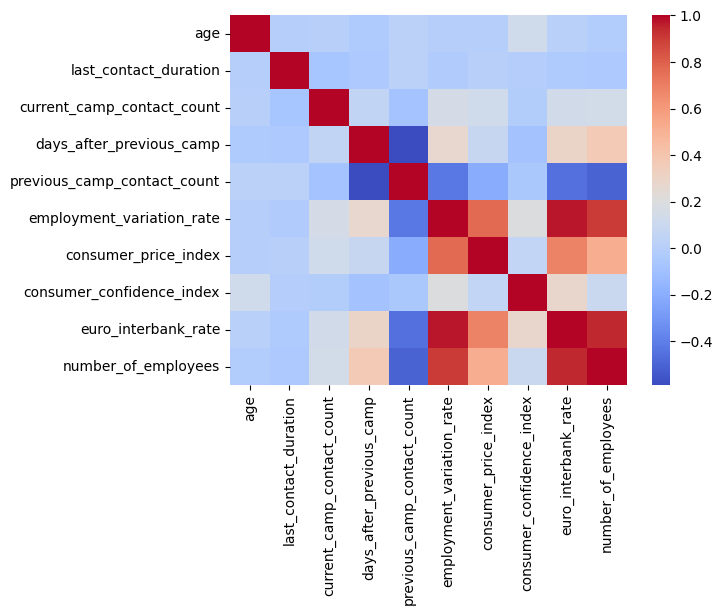

In [78]:
snb.heatmap(corr_matrix, cmap= 'coolwarm')

In [84]:
corr_matrix.columns

Index(['age', 'last_contact_duration', 'current_camp_contact_count',
       'days_after_previous_camp', 'previous_camp_contact_count',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euro_interbank_rate',
       'number_of_employees'],
      dtype='object')

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [92]:
features = df_v2[corr_matrix.columns]
target = df_v2['current_outcome']
X = features
y = target

#convertendo y para uma variável númerica 
le = LabelEncoder()
y = le.fit_transform(y)
# divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:2f}')

# Calcular a acurácia do modelo nos dados de teste
y_pred = model.predict(X_test)
y_pred = y_pred.round()  # arredondar as previsões para 0 ou 1
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')

MSE: 0.069633
Acurácia: 0.90
